#### Initiation

In [8]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler

# import keras
# from tensorflow import keras
# from keras.layers import Dense, Activation,Dropout
# from keras.models import Sequential

# from sklearn.cross_validation import cv


In [9]:
# Install & import pandas_profiling
#!pip install pandas_profiling

# import pandas_profiling

#### Read Data

In [10]:
# Read Boston housing price

df_data = pd.read_csv('housing.csv')
df_data.shape

(489, 4)

In [11]:
df_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [12]:
# Print out the information of dataset. 

df_data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

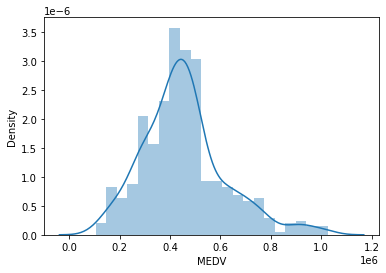

In [13]:
# Dist of parameters

sns.distplot(df_data['MEDV'])

#### Data Analysis

In [14]:
# Definition

# Features:

# RM: average number of rooms per dwelling
# LSTAT: percentage of population considered lower status
# PTRATIO: pupil-teacher ratio by town

# Target Variable:
# MEDV: median value of owner-occupied homes in $

In [15]:
# Define target & features

prices = df_data['MEDV'] 
features = df_data.drop(columns='MEDV')

In [16]:
# Explore correlations between numerical features

# Compute correlations between all features
df_corr = features.corr()

<AxesSubplot:>

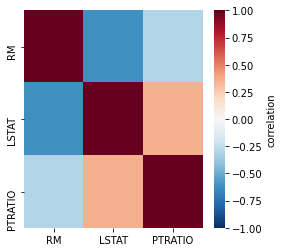

In [17]:
# Plot correlations as a heatmap
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(df_corr, vmin=-1, vmax=1, cmap = 'RdBu_r', xticklabels=True, yticklabels=True, cbar_kws={'label' : 'correlation'}, ax=ax)

#### Hypothesis

#### Modeling

In [18]:
# Split data into train and test 
# 30% of data is kept to test ML model. 

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.3, random_state=0)

#### 1 - Linear Regression

In [19]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_train = model.predict(X_train)

In [21]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [ 85325.36412937 -10775.41479323 -20133.58779106]
Intercept: 434789.45509552304
Mean squared error (MSE): 7049861389.31
Coefficient of determination (R^2): 0.73


In [22]:
y_pred_test = model.predict(X_test)

In [23]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [ 85325.36412937 -10775.41479323 -20133.58779106]
Intercept: 434789.45509552304
Mean squared error (MSE): 9232768512.15
Coefficient of determination (R^2): 0.68


In [24]:
yintercept = '%.2f' % model.intercept_
LogP = '%.2f LogP' % model.coef_[0]
MW = '%.4f MW' % model.coef_[1]
RB = '%.4f RB' % model.coef_[2]
# AP = '%.2f AP' % model.coef_[3]


In [25]:
# print('LogS = ' + 
#       ' ' + 
#       yintercept + 
#       ' ' + 
#       LogP + 
#       ' ' + 
#       MW + 
#       ' + ' + 
#       RB)

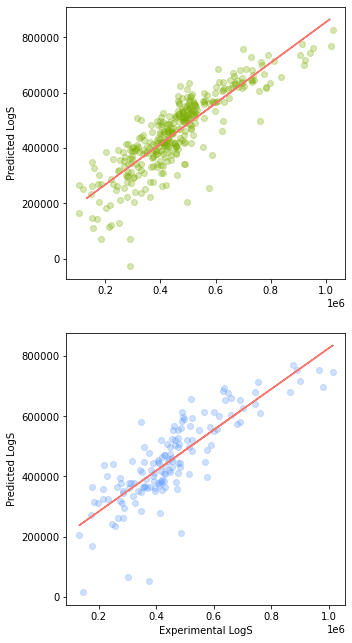

In [26]:


plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

plt.savefig('plot_vertical_logS.png')
plt.savefig('plot_vertical_logS.pdf')
plt.show()

#### 2 - Neural Network Modeling

In [27]:
#Scaling the dataset

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

NameError: name 'Sequential' is not defined